## **Práctica 3**

In [461]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score

#### **Carga de datos**

In [462]:
data = load_digits()

In [463]:
data.data.shape

(1797, 64)

| Description       | Number       |
|-------------------|--------------|
| Samples total     | 1967          |
| Dimensionality    | 64           |

In [464]:
x = data.data
y = data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### **2 Dimensiones**

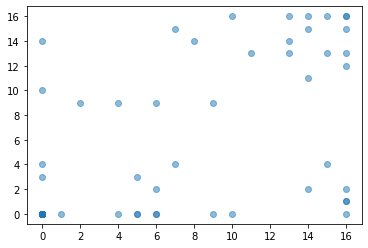

In [465]:
plt.scatter(x_train[0], x_train[1], alpha=0.5, cmap='viridis')
plt.show()

#### **3 Dimensiones**

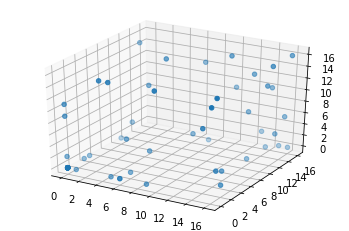

In [466]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_train[0], x_train[1], x_train[2], cmap='viridis');

#### **Aumentando las dimensiones del dataset original**

In [467]:
poly = PolynomialFeatures(2)
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)

In [468]:
poly_x_train.shape

(1257, 2145)

A medida que el número de dimensiones aumenta, la distancia media también aumenta. El siguiente gráfico muestra este efecto en las 2145 dimensiones que ahora posee el dataset.

También es importante mencionar que el aprendizaje se vuelve más difícil porque las predicciones para las nuevas muestras tienen menos probabilidades de basarse en el aprendizaje de características del entrenamiento.

In [469]:
distance = euclidean_distances(poly_x_train, poly_x_train)

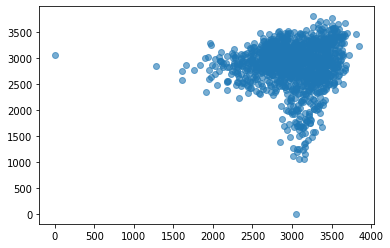

In [470]:
plt.scatter(distance[0], distance[1], alpha=0.6, cmap='viridis')
plt.show()

#### **K Nearest Neighbors**

Utilizando el -KNN- y aplicando la métrica -accuracy score- para evaluar la exactitud con todas las dimensiones que posee en este momento el dataset.

In [471]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(poly_x_train, y_train)
y_pred = knn.predict(poly_x_test)
print(accuracy_score(y_test, y_pred))

0.9833333333333333


#### **Reducción de dimensionalidad**: 

Una solución para evitar la maldición de la dimensionalidad es reducir las dimensiones. A continuación se harán pruebas con algunos algoritmos establecidos en sklearn.

#### **PCA**  -Principal Component Analysis-

In [455]:
pca = PCA(n_components = 2).fit(poly_x_train)
x_train_pca = pca.transform(poly_x_train)
x_test_pca = pca.transform(poly_x_test)

#### **Reducción a 2 dimensiones**

In [472]:
x_train_pca.shape

(1257, 2)

#### **Calculando de nuevo la exactitud**

In [477]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_pca, y_train)
y_pred = knn.predict(x_test_pca)
print(accuracy_score(y_test, y_pred))

0.5444444444444444


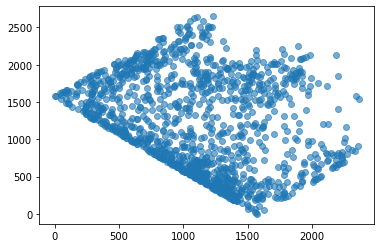

In [475]:
distance = euclidean_distances(x_train_pca, x_train_pca)
plt.scatter(distance[0], distance[1], alpha=0.6, cmap='viridis')
plt.show()

#### **TSNE**  -distributed Stochastic Neighbor Embedding-

In [478]:
x_train_tsne = TSNE(n_components=2).fit_transform(poly_x_train)
x_test_tsne = TSNE(n_components=2).fit_transform(poly_x_test)

#### **Reducción a 2 dimensiones**

In [480]:
x_train_tsne.shape

(1257, 2)

#### **Calculando de nuevo la exactitud**

In [479]:
knn.fit(x_train_tsne, y_train)
y_pred = knn.predict(x_test_tsne)
print(accuracy_score(y_test, y_pred))

0.1574074074074074


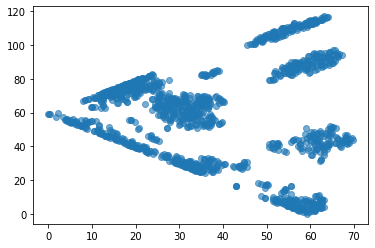

In [481]:
distance = euclidean_distances(x_train_tsne, x_train_tsne)
plt.scatter(distance[0], distance[1], alpha=0.6, cmap='viridis')
plt.show()

### **Conclusión**

La maldición de dimensionalidad puede sugerir que se conserven el modelo simple, pero, por otro lado, si el modelo es demasiado simple, se corre el riesgo de sufrir fallas. Los problemas surgiran cuando el modelo posea un poder de representación tan bajo que no puede modelar los datos incluso si se tuvieran todos los datos de entrenamiento que se desean.